# Тестирование алгоритмов бустинга

In [209]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Загрузка модели 
Telco Customer Churn - Отток клиентов

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [210]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [211]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Число строк (клиентов) и столбцов (признаков):

In [212]:
data.shape

(7043, 21)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Столбцы:
```
0  customerID - Пользовательский ИД
1  gender - Пол - Является ли клиент мужчиной или женщиной (Male, Female)
2  SeniorCitizen - Пожилой - Является ли клиент пожилым гражданином или нет (1, 0)
3  Partner - Супруг - Есть ли у клиента супруг(а) или нет (Yes, No)
4  Dependents - Иждивенцы - Есть ли у клиента иждивенцы или нет (Yes, No) 
5  tenure - Владение - Количество месяцев, в течение которых клиент оставался в компании  
6  PhoneService - Телефонный сервси - Есть ли у клиента телефонная служба или нет (Yes, No)
7  MultipleLines - Несколько линий - Есть ли у клиента несколько линий или нет (Yes, No, No phone service)
8  InternetService - Интернет-провайдер клиента (DSL, Fiber optic, No)
9  OnlineSecurity - Онлайн-безопасность - Есть ли у клиента онлайн-безопасность или нет (Yes, No, No internet service)
10 OnlineBackup - Онлайн-бэкап - Есть ли у клиента онлайн-резервное копирование или нет (Yes, No, No internet service)
11 DeviceProtection - Защита устройтсва - Есть ли у клиента защита устройства или нет (Yes, No, No internet service)
12 TechSupport - Техническая поддержка - Есть ли у клиента техническая поддержка или нет  (Yes, No, No internet service) 
13 StreamingTV - Потоковое TV - Есть ли у клиента потоковое телевидение или нет (Yes, No, No internet service) 
14 StreamingMovies - Потоковое кино -  Есть ли у клиента потоковое кино или нет (Yes, No, No internet service)
15 Contract - Договор - Срок контракта заказчика (Month-to-month, One year, Two year)
16 PaperlessBilling - Безбумажный выставление счетов (Yes, No)
17 PaymentMethod - Способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
18 MonthlyCharges - Ежемесячные платежи - Сумма, списываемая с клиента ежемесячно
19 TotalCharges  - Всего начислений - Общая сумма, списанная с клиента
20 Churn - Отток - Ушел ли клиент или нет (Yes or No)
```

# EDA & Preprocessing

Проверка на пропуски

In [214]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Распределение целевой переменной

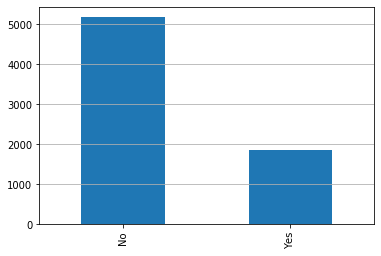

In [215]:
data['Churn'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [216]:
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Выбрасываем поле CustomerID

In [217]:
data_preproc = data.drop(['customerID'], axis=1)

кодирование категориальных значений

In [218]:
enc = OrdinalEncoder()
columns = np.setdiff1d(data_preproc.columns, ['SeniorCitizen','tenure','MonthlyCharges'])

data_preproc[columns] = enc.fit_transform(data_preproc[columns])

In [219]:
data_preproc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


In [220]:
# Set up label column
y_column = "Churn"

# Select X column
X_columns = data_preproc.columns[data_preproc.columns != y_column]

X_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

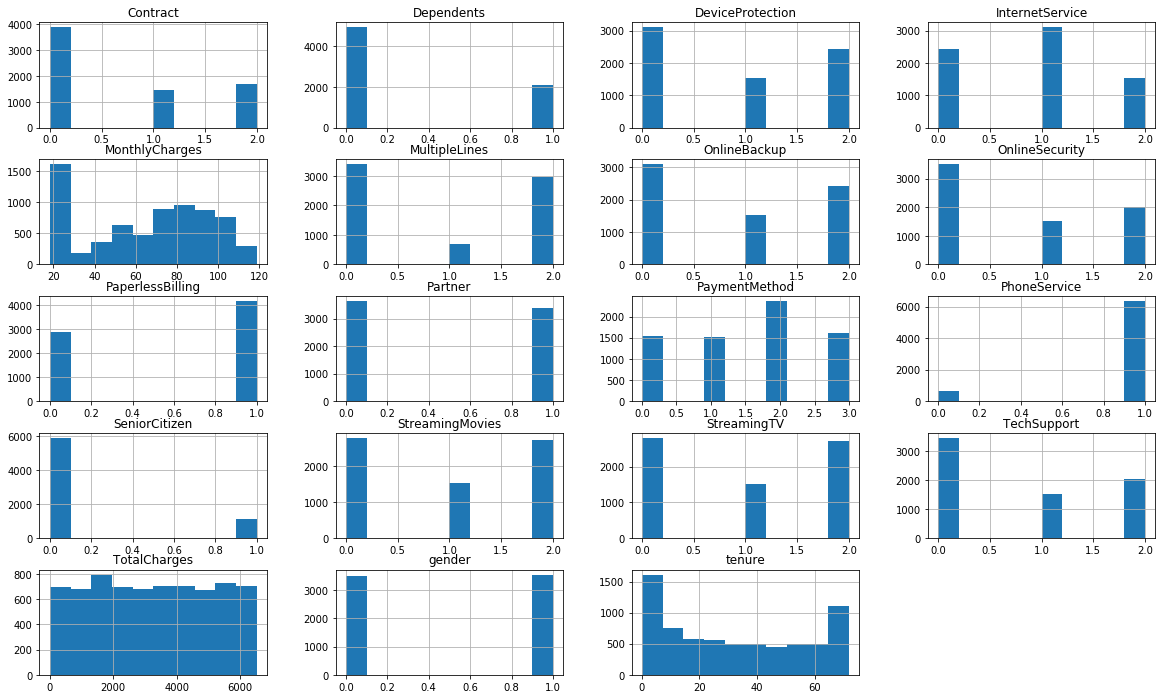

In [221]:
data_preproc[X_columns].hist(figsize=(20,12));

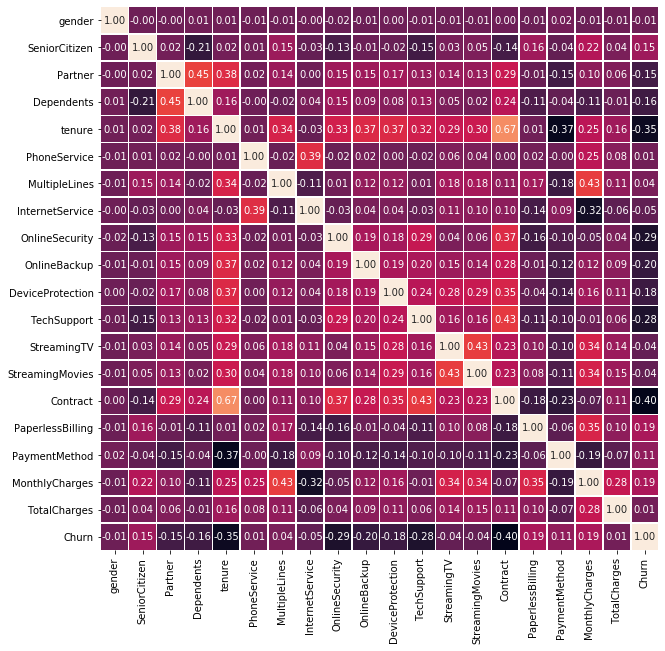

In [222]:
#correlation map
plt.figure(figsize=(10, 10))
sns.heatmap(data_preproc.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

По матрице корреляции видно, что признаки Contract (срок договора) и tenure (время в течении которго клиент оставался в компании) очень сильно зависимы. Также как и признаки Dependents (иждивенцы) и Partner (супруг)


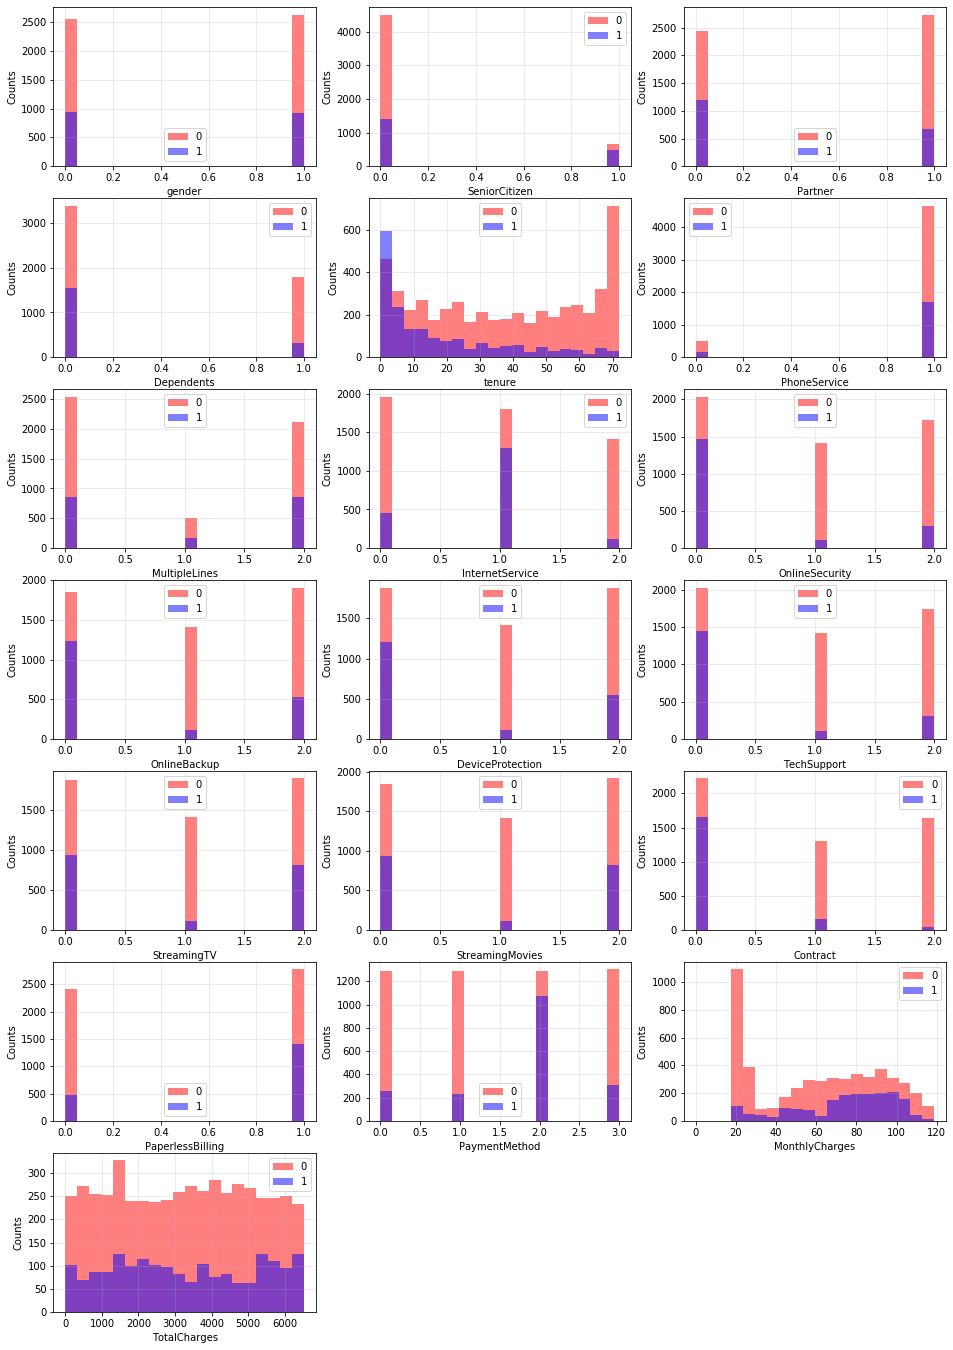

In [223]:
# Define size of the figure
plt.figure(figsize=(16, 24))

# For each column ...
for i_col in range(len(X_columns)):
    
    # Create subplot for each column
    plt.subplot(7, 3, i_col+1)
    
    # Get column and label values
    x_col = data_preproc[X_columns[i_col]].values
    y_col = data_preproc[y_column].values
    
    # Plot histograms
    bins = np.linspace(0, x_col.max(), 21)
    plt.grid(alpha = 0.3)
    plt.hist(x_col[y_col == 0], bins=bins, color='r', alpha=0.5, label='0')
    plt.hist(x_col[y_col == 1], bins=bins, color='b', alpha=0.5, label='1')
    
    # Labels and legend
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')
    
plt.show()

### Data Split

In [224]:
# import train_test_split function to split the sample
from sklearn.model_selection import train_test_split
X = data_preproc[X_columns].values
y = data_preproc[y_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,    # 30% for test, 70% for train
                                                    random_state=123) # shuffle objects before split

## Сравнение 4 вариантов градиентного бустинга из коробки

### 1. Gradient Boosting

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, verbose=True).fit(X_train, y_train)
gbm = GradientBoostingClassifier(verbose=True, random_state=123).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0972            1.51s
         2           1.0545            1.39s
         3           1.0231            1.13s
         4           0.9942            1.03s
         5           0.9718            0.95s
         6           0.9520            0.89s
         7           0.9339            0.88s
         8           0.9199            0.93s
         9           0.9065            0.97s
        10           0.8944            1.00s
        20           0.8264            0.89s
        30           0.7961            0.75s
        40           0.7787            0.65s
        50           0.7658            0.52s
        60           0.7562            0.43s
        70           0.7480            0.34s
        80           0.7405            0.23s
        90           0.7326            0.11s
       100           0.7261            0.00s


In [226]:
y_pred_gbm = gbm.predict(X_test)
#print(classification_report(y_test, pred))

In [243]:
from sklearn.metrics import roc_auc_score

print('Train GB Accuracy =', gbm.score(X_train, y_train)) 
print('Test GB Accuracy =', gbm.score(X_test, y_test)) 
#print('Test GB Recall =', recall_score(y_test, y_pred_gbm)) 
#print('Test GB Precision =', precision_score(y_test, y_pred_gbm))
print ('Train GB ROC-AUC =', roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
print ('Test GB ROC-AUC = ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

Train GB Accuracy = 0.8367139959432048
Test GB Accuracy = 0.7889256980596309
Train GB ROC-AUC = 0.8872779828975705
Test GB ROC-AUC =  0.8383231133912772


In [228]:
gbm.predict(X_train)

array([0., 0., 0., ..., 1., 0., 1.])

In [229]:
gbm.predict_proba(X_train)

array([[0.79969893, 0.20030107],
       [0.84013284, 0.15986716],
       [0.84570112, 0.15429888],
       ...,
       [0.29845175, 0.70154825],
       [0.70448514, 0.29551486],
       [0.2701113 , 0.7298887 ]])

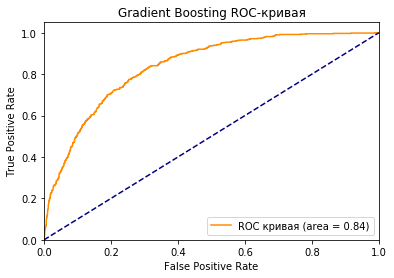

In [230]:
from sklearn.metrics import roc_curve, auc

lr_auc = roc_auc_score(y_test,  gbm.predict_proba(X_test)[:,1])
fpr, tpr, treshold = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### 2. XGBoost

In [231]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [248]:
# create model instance
#bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst = XGBClassifier(random_state=123)
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred_bst = bst.predict(X_test)

In [249]:
print('Train XGB Accuracy =', bst.score(X_train, y_train)) 
print('Test XGB Accuracy =', bst.score(X_test, y_test)) 
print ('Train XGB ROC-AUC =', roc_auc_score(y_train, bst.predict_proba(X_train)[:,1]))
print ('Test XGB ROC-AUC = ', roc_auc_score(y_test, bst.predict_proba(X_test)[:,1]))

Train XGB Accuracy = 0.9478701825557809
Test XGB Accuracy = 0.7723615712257453
Train XGB ROC-AUC = 0.9883565696546769
Test XGB ROC-AUC =  0.8097343556984988


In [234]:
#Еще один вариант работы с XGB
#dtrain = xgb.DMatrix(X_train, y_train)
#dtest = xgb.DMatrix(X_test, y_test)

# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
#num_round = 2

#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)

### 3.CatBoost

In [235]:
!pip install --upgrade catboost==0.25

Requirement already up-to-date: catboost==0.25 in c:\programdata\anaconda3\lib\site-packages (0.25)


In [244]:
from catboost import CatBoostClassifier 

#cbc = CatBoostClassifier(iterations=300, logging_level='Silent')
cbc = CatBoostClassifier(logging_level='Silent', random_state=123)
cbc.fit(X_train, y_train)

y_pred_cbc = cbc.predict(X_test)

In [245]:
print('Train CatBoost Accuracy =', cbc.score(X_train, y_train)) 
print('Test CatBoost Accuracy =', cbc.score(X_test, y_test)) 
print ('Train CatBoost ROC-AUC =', roc_auc_score(y_train, cbc.predict_proba(X_train)[:,1]))
print ('Test CatBoost ROC-AUC = ', roc_auc_score(y_test, cbc.predict_proba(X_test)[:,1]))

Train CatBoost Accuracy = 0.8864097363083164
Test CatBoost Accuracy = 0.792238523426408
Train CatBoost ROC-AUC = 0.9484968720213106
Test CatBoost ROC-AUC =  0.8344274792169781


### 4. LightGBM

In [246]:
#! pip install lightgbm
from lightgbm import LGBMClassifier

#lgbm = LGBMClassifier(n_estimators=300)
lgbm = LGBMClassifier(num_threads=12, random_state=123)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 1279, number of negative: 3651
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259432 -> initscore=-1.048923
[LightGBM] [Info] Start training from score -1.048923


In [247]:
print('Train LightGBM Accuracy =', lgbm.score(X_train, y_train)) 
print('Test LightGBM Accuracy =', lgbm.score(X_test, y_test)) 
print ('Train LightGBM ROC-AUC =', roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1]))
print ('Test LightGBM ROC-AUC = ', roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1]))

Train LightGBM Accuracy = 0.8993914807302231
Test LightGBM Accuracy = 0.7865593942262187
Train LightGBM ROC-AUC = 0.9629387045523317
Test LightGBM ROC-AUC =  0.8287317626896068


### Выводы
Из коробки лидирует Gradient Boosting (но работает существенно медленее остальных алгоритмов):
1. Test GB ROC-AUC =  0.8383231133912772
2. Test CatBoost ROC-AUC =  0.8344274792169781
3. Test LightGBM ROC-AUC =  0.8287317626896068
4. Test XGB ROC-AUC =  0.8097343556984988

## Настройка Гиперпараметров и сравнение Моделей



### 1. Gradient Boosting

In [251]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [20, 100, 200, 500, 1000]
}

estimator = GradientBoostingClassifier(verbose=False, random_state=123)

gbm = GridSearchCV(estimator, param_grid, n_jobs = 10, scoring = 'roc_auc', verbose=True, cv=5)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print(f'Best parameters found by grid search are: {gbm.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   57.8s finished


Best parameters found by grid search are: {'learning_rate': 0.01, 'n_estimators': 500}


In [275]:
print('For Best parameters:')
print('Train GB Accuracy =', gbm.best_estimator_.score(X_train, y_train)) 
print('Test GB Accuracy =', gbm.best_estimator_.score(X_test, y_test)) 
print ('Train GB ROC-AUC =', roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
print ('Test GB ROC-AUC = ', roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

For Best parameters:
Train GB Accuracy = 0.8253549695740365
Test GB Accuracy = 0.7879791765262659
Train GB ROC-AUC = 0.8729165636070875
Test GB ROC-AUC =  0.840158251443961


### 2.XGBoost

In [253]:
param_grid = {
    'max_depth': range (2, 5, 1),
    'n_estimators': range(10, 100, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

estimator = XGBClassifier(random_state=123)

bst = GridSearchCV(estimator, param_grid, n_jobs = 10, scoring = 'roc_auc', verbose=True, cv=5)
bst.fit(X_train, y_train)
y_pred_bst = bst.predict(X_test)

print(f'Best parameters found by grid search are: {bst.best_params_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.0s
[Parallel(n_jobs=10)]: Done 405 out of 405 | elapsed:   19.5s finished


Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}


In [274]:
print('For Best parameters:')
print('Train XGB Accuracy =', bst.best_estimator_.score(X_train, y_train)) 
print('Test XGB Accuracy =', bst.best_estimator_.score(X_test, y_test)) 
print ('Train XGB ROC-AUC =', roc_auc_score(y_train, bst.predict_proba(X_train)[:,1]))
print ('Test XGB ROC-AUC = ', roc_auc_score(y_test, bst.predict_proba(X_test)[:,1]))

For Best parameters:
Train XGB Accuracy = 0.8265720081135902
Test XGB Accuracy = 0.7879791765262659
Train XGB ROC-AUC = 0.875933826862905
Test XGB ROC-AUC =  0.8411570606630534


### 3.CatBoost

In [256]:
param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'iterations': [10, 50, 100, 150, 200, 250, 300]}

estimator = CatBoostClassifier(logging_level='Silent', random_state=123)
cbc = GridSearchCV(estimator, param_grid, scoring = 'roc_auc', n_jobs = 10, verbose=True, cv=5)
cbc.fit(X_train, y_train)
y_pred_cbc = cbc.predict(X_test)

print(f'Best parameters found by grid search are: {cbc.best_params_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   41.1s
[Parallel(n_jobs=10)]: Done 210 out of 210 | elapsed:  1.5min finished


Best parameters found by grid search are: {'depth': 4, 'iterations': 150, 'learning_rate': 0.1}


In [273]:
print('For Best parameters:')
print('Train CatBoost Accuracy =', cbc.best_estimator_.score(X_train, y_train)) 
print('Test CatBoost Accuracy =', cbc.best_estimator_.score(X_test, y_test)) 
print ('Train CatBoost ROC-AUC =', roc_auc_score(y_train, cbc.predict_proba(X_train)[:,1]))
print ('Test CatBoost ROC-AUC = ', roc_auc_score(y_test, cbc.predict_proba(X_test)[:,1]))

For Best parameters:
Train CatBoost Accuracy = 0.8279918864097363
Test CatBoost Accuracy = 0.7936583057264552
Train CatBoost ROC-AUC = 0.8769438642770122
Test CatBoost ROC-AUC =  0.842997763112501


### 4. LightGBM

In [258]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'n_estimators': [50, 100, 200],
}

estimator = LGBMClassifier(num_threads=12, force_col_wise=True, random_state=123)
lgbm = GridSearchCV(estimator, param_grid, scoring = 'roc_auc', n_jobs = 10, verbose=True, cv=5)
lgbm.fit(X_train, y_train)
y_pred_cbc = lgbm.predict(X_test)

print(f'Best parameters found by grid search are: {lgbm.best_params_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s


[LightGBM] [Info] Number of positive: 1279, number of negative: 3651
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259432 -> initscore=-1.048923
[LightGBM] [Info] Start training from score -1.048923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 15}


[Parallel(n_jobs=10)]: Done 405 out of 405 | elapsed:    0.9s finished


In [267]:
print('For Best parameters:')
print('Train LightGBM Accuracy =', lgbm.best_estimator_.score(X_train, y_train)) 
print('Test LightGBM Accuracy =', lgbm.best_estimator_.score(X_test, y_test)) 
print ('Train LightGBM ROC-AUC =', roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1]))
print ('Test LightGBM ROC-AUC = ', roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1]))

For Best parameters:
Train LightGBM Accuracy = 0.8221095334685599
Test LightGBM Accuracy = 0.7856128726928537
Train LightGBM ROC-AUC = 0.8704287856701249
Test LightGBM ROC-AUC =  0.8411392545934094


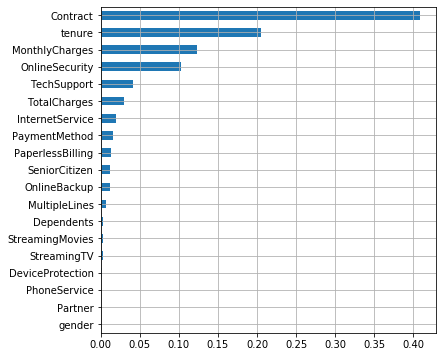

In [302]:
# Отображаем самые важные признаки Gradient Boosting
(pd.DataFrame(data={'score': gbm.best_estimator_.feature_importances_}, 
                      index=X_columns).sort_values(by='score')
                                      .plot(kind='barh', grid=True,
                                            figsize=(6,6), legend=False))

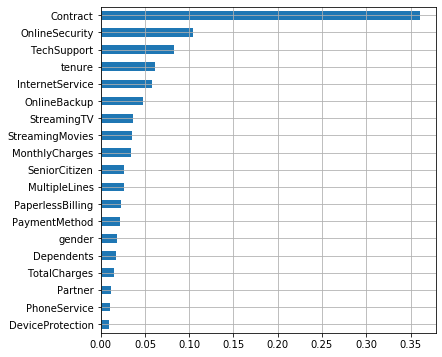

In [299]:
# Отображаем самые важные признаки XGBoost
(pd.DataFrame(data={'score': bst.best_estimator_.feature_importances_}, 
                      index=X_columns).sort_values(by='score')
                                      .plot(kind='barh', grid=True,
                                            figsize=(6,6), legend=False))

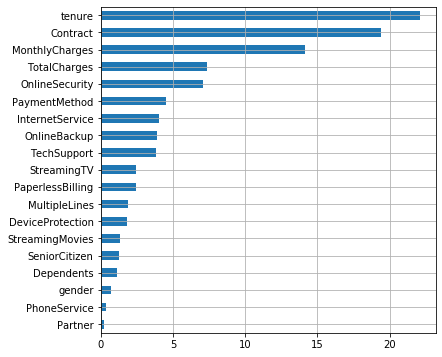

In [304]:
# Отображаем самые важные признаки  CatBoost
(pd.DataFrame(data={'score': cbc.best_estimator_.feature_importances_}, 
                      index=X_columns).sort_values(by='score')
                                      .plot(kind='barh', grid=True,
                                            figsize=(6,6), legend=False))

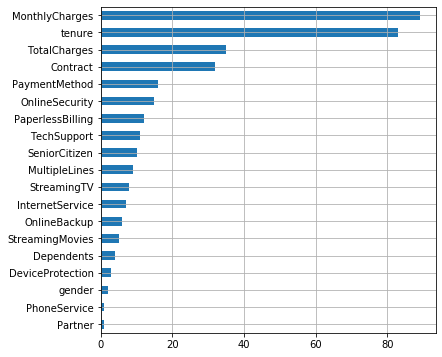

In [300]:
# Отображаем самые важные признаки LightGBM
(pd.DataFrame(data={'score': lgbm.best_estimator_.feature_importances_}, 
                      index=X_columns).sort_values(by='score')
                                      .plot(kind='barh', grid=True,
                                            figsize=(6,6), legend=False))

### Выводы
После настройки параметров изменились лидеры:
1. Test CatBoost ROC-AUC =  0.842997763112501
2. Test XGB ROC-AUC =  0.8411570606630534
3. Test LightGBM ROC-AUC =  0.8411392545934094
4. Test GB ROC-AUC =  0.840158251443961

ROC-AUC для всех моделей получился практически одинаковый, но хочеться выделить модель LightGBM, которая работает намного быстрее остальных.  